In [1]:
import torch
import matplotlib.pyplot as plt
from predict import predict_distmap
import numpy as np
from ConvNet import ConvNet
from Inception import Inception

In [2]:
convnet = ConvNet()
sd = torch.load('../../steps/convnet_results/model.pth',  map_location=torch.device('cpu'))
convnet.load_state_dict(sd['model'])

<All keys matched successfully>

In [4]:
inception = Inception()
sd = torch.load('../../steps/inception_results/model.pth',  map_location=torch.device('cpu'))
inception.load_state_dict(sd['model'])

<All keys matched successfully>

In [3]:
a = predict_distmap(model, '16pkA01')

# After 1st epoch

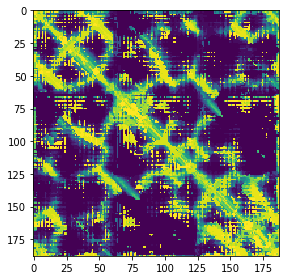

In [11]:
plt.imshow(a, cmap='viridis_r');
plt.savefig('../../plots/16pkpredicted.png', dpi=100)
plt.tight_layout()

In [8]:
y = torch.load('../../data/our_input/distance_maps/distance_maps32/16pkA01.pt')

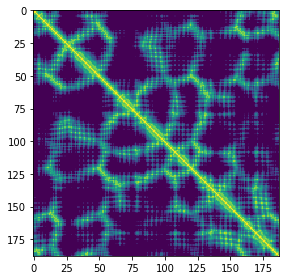

In [12]:
plt.imshow(y, cmap='viridis_r')
plt.savefig('../../plots/16pkreal.png', dpi=100)
plt.tight_layout();

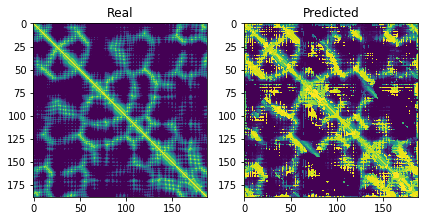

In [17]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(y, cmap='viridis_r')
ax[0].set_title('Real')
ax[1].imshow(a, cmap='viridis_r')
ax[1].set_title('Predicted')

plt.tight_layout()

plt.savefig('../../plots/16pk_real_predicted.png', dpi=100);

# After 2nd epoch

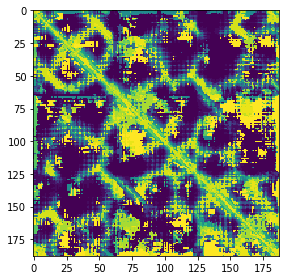

In [4]:
plt.imshow(a, cmap='viridis_r');
plt.savefig('../../plots/16pkpredicted.png', dpi=100)
plt.tight_layout()

# After 3rd epoch

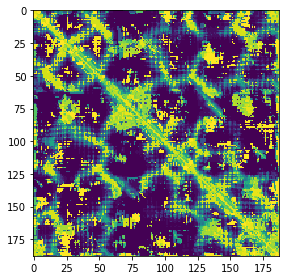

In [4]:
plt.imshow(a, cmap='viridis_r');
plt.savefig('../../plots/16pkpredicted.png', dpi=100)
plt.tight_layout()

# For 5 different proteins

In [6]:
train_domains = np.loadtxt('../../data/our_input/train_domains.csv', dtype='O')

IndexError: index 5 is out of bounds for axis 0 with size 5

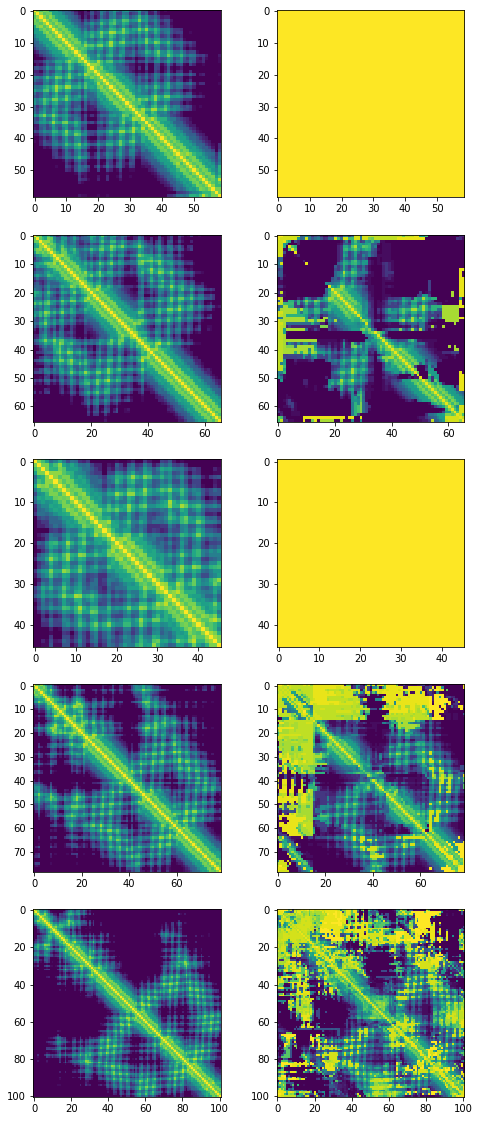

In [10]:
fig, ax = plt.subplots(5, 2, figsize=(8, 20))
for i, d in enumerate(train_domains):
    y = torch.load(f'../../data/our_input/distance_maps/distance_maps32/{d}.pt')
    p = predict_distmap(convnet, d)
    
    ax[i, 0].imshow(y, cmap='viridis_r')
    ax[i, 1].imshow(p, cmap='viridis_r')
plt.tight_layout()

IndexError: index 5 is out of bounds for axis 0 with size 5

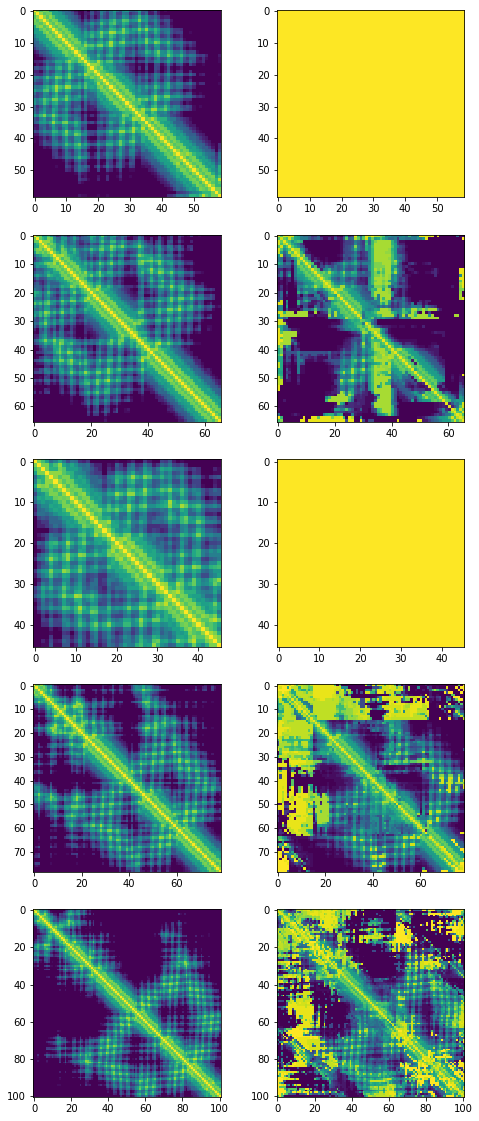

In [9]:
fig, ax = plt.subplots(5, 2, figsize=(8, 20))
for i, d in enumerate(train_domains):
    y = torch.load(f'../../data/our_input/distance_maps/distance_maps32/{d}.pt')
    p = predict_distmap(inception, d)
    
    ax[i, 0].imshow(y, cmap='viridis_r')
    ax[i, 1].imshow(p, cmap='viridis_r')
plt.tight_layout()

In [3]:
X = torch.load(f'../../data/our_input/tensors/{train_domains[0]}_X.pt')
Y = torch.load(f'../../data/our_input/distance_maps/distance_maps32/{train_domains[0]}.pt')

In [4]:
from predict import *
from crops import make_batches

In [9]:
i, o = make_batches(X, Y, random_state=3)

In [11]:
a = unpad_crop(o[0], o[0])

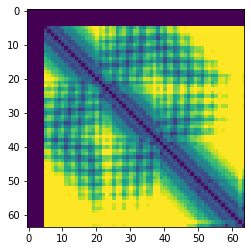

In [10]:
plt.imshow(o[0])

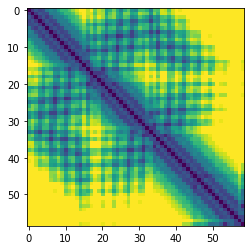

In [12]:
plt.imshow(a)

In [29]:
i.shape

torch.Size([1, 569, 64, 64])

In [31]:
a = model.predict(i[:1])

In [32]:
torch.max(a)

tensor(0., grad_fn=<MaxBackward1>)

In [33]:
train_domains[:5]

array(['1zv1A00', '3t6pA02', '2ekfA01', '3q8gA01', '3hy5A01'],
      dtype=object)

---

In [1]:
import torch
from predict import predict_outputs
import matplotlib.pyplot as plt
from Inception_aux import Inception_aux
from AlphaFold import AlphaFold
import pickle

In [2]:
# %% LOAD ALPHAFOLD
model = AlphaFold()#.to('cuda')

#sd = torch.load('../../steps/alphafold_results/model.pth')
sd = torch.load('../../steps/alphafold_results/model.pth', map_location=torch.device('cpu'))
model.load_state_dict(sd['model'])

<All keys matched successfully>

In [4]:
# %% Predict 139lA00
p16pk = predict_outputs(model, '16pkA01')

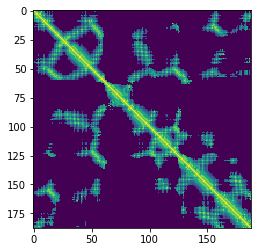

In [5]:
plt.imshow(torch.argmax(p16pk['distogram'], dim=0), cmap='viridis_r')

In [6]:
p1z6m = predict_outputs(model, '1z6mA02')

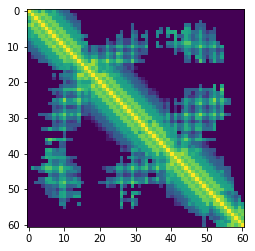

In [7]:
plt.imshow(torch.argmax(p1z6m['distogram'], dim=0), cmap='viridis_r')

In [9]:
inc = Inception_aux()#.to('cuda')

#sd = torch.load('../../steps/alphafold_results/model.pth')
sd = torch.load('../../steps/inception_results/model.pth', map_location=torch.device('cpu'))
inc.load_state_dict(sd['model'])

<All keys matched successfully>

In [10]:
p1z6m_i = predict_outputs(inc, '1z6mA02')

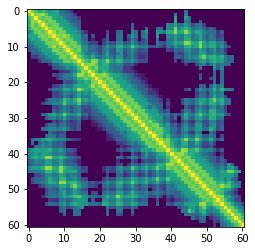

In [11]:
plt.imshow(torch.argmax(p1z6m_i['distogram'], dim=0), cmap='viridis_r')

In [12]:
with open('../../steps/predicted_outputs/1z6mA02.out', 'wb') as f:
    pickle.dump(p1z6m_i, f)

In [14]:
p139l_i = predict_outputs(inc, '139lA00')

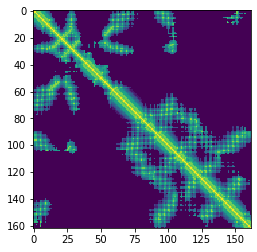

In [15]:
plt.imshow(torch.argmax(p139l_i['distogram'], dim=0), cmap='viridis_r')